#### **1. IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd # For data manipulation and analysis.
import matplotlib.pyplot as plt # For creating data visualizations.
import seaborn as sns  # Library for statistical data visualization

#### **2. IMPORTING THE SUPERMARKET DATASET**

In [2]:
# Loading the raw dataset
data = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\train_og\\Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **3. UNDERSTANDING THE DATA**

In [3]:
# Shape of the data in rows & columns

rows, columns = data.shape

print("Total number of rows:", rows)
print("Total number of columns:", columns)


Total number of rows: 8523
Total number of columns: 12


In [4]:
# Basic info and structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Data type of each column
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# Basic statistics for numerical columns
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **4. UNIQUE VALUES FROM CATEGORICAL COLUMNS**

This section reveals the unique values in categorical columns, highlighting the diversity of data within each category.

In [7]:
# Unique values from Categorical Columns
categorical_cols = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 
                    'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn '{col}':")
    print("Number of unique values:", data[col].nunique())
    print("Unique values:", data[col].unique())


Unique Values in Categorical Columns:

Column 'Item_Identifier':
Number of unique values: 1559
Unique values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Column 'Item_Type':
Number of unique values: 16
Unique values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Column 'Outlet_Identifier':
Number of unique values: 10
Unique values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Column 'Item_Fat_Content':
Number of unique values: 5
Unique values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Column 'Outlet_Size':
Number of unique values: 3
Unique values: ['Medium' nan 'High' 'Small']

Column 'Outlet_Location_Type':
Number of unique values: 3
Unique values: ['Tier 1' 'Tier 3' 'Tier 2']

Column 'Outlet_Type':
Number of unique values: 4
Unique values: ['Supermarket Ty

#### **5. VISUALIZATION:** 

##### Average Item Outlet Sales by Outlet Type
This bar plot shows the average outlet sales for each item type, helping to identify which categories perform better in sales. The x-axis represents item types, and the y-axis shows their average sales.

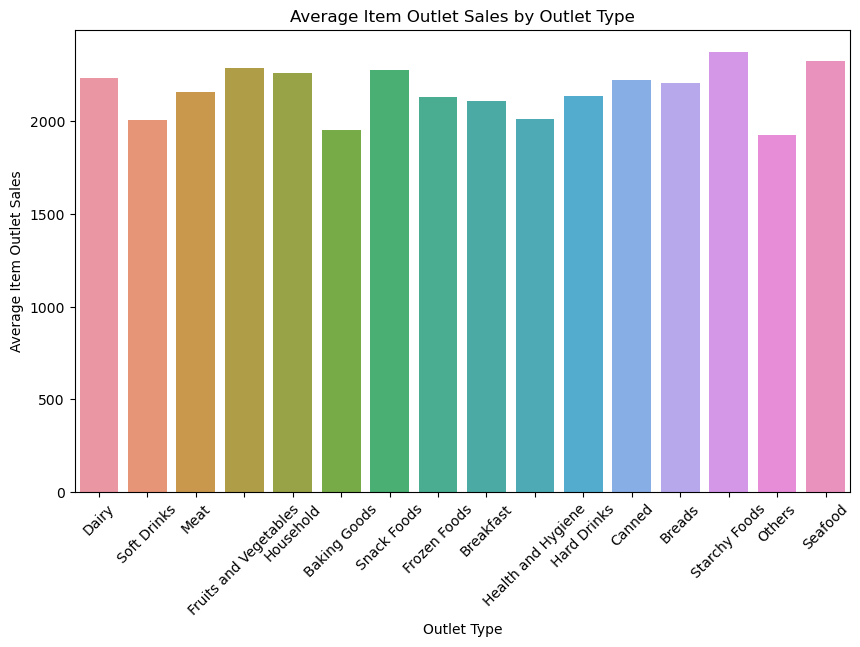

In [8]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Item_Type', y='Item_Outlet_Sales', estimator=np.mean, ci=None)
plt.title('Average Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()
